In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100) #if you print a serires, show me the first 100 rows by default

plt.rcParams['figure.figsize'] = [18, 6] #setting the default size of the charts
plt.rcParams['axes.grid'] = True

# Class 7 - Intro to Machine Learning

A Machine Learning Engineer's Toolbox:

<ol>
    <li>Linear Regression</li> (Today)
    <li>Logistic Regression </li> (Homework)
    <li>Decision Tree </li> (Homework)
    <li>SVM </li> (Homework)
    <li>Naive Bayes </li> (Homework)
    <li>kNN </li> (Homework)
    <li>K-Means </li> (Homework)
    <li>Random Forest</li> (Later)
    <li>Dimensionality Reduction Algorithm</li> (Later)
    <li>Gradient Boosting Algorithm</li> (Later)
    <li>GBM</li> (Later)
    <li>XGBoost</li> (Later)
    <li>LightGBM</li> (Later)
    <li>CatBoost</li> (Later)
</ol>

# 1. A Machine Learning Engineer's Toolbox

### 1.1 Regression

* Regression searches for relationships among variables.

In [2]:
!ls data

house_prices_description.txt


## Example Dataset - Housing Prices

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

You can find the data [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt).

In [65]:
data = pd.read_csv('train.csv')

In [5]:
!cat data/house_prices_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Text(0.5, 1.0, 'Lot Area Vs. Sales Price')

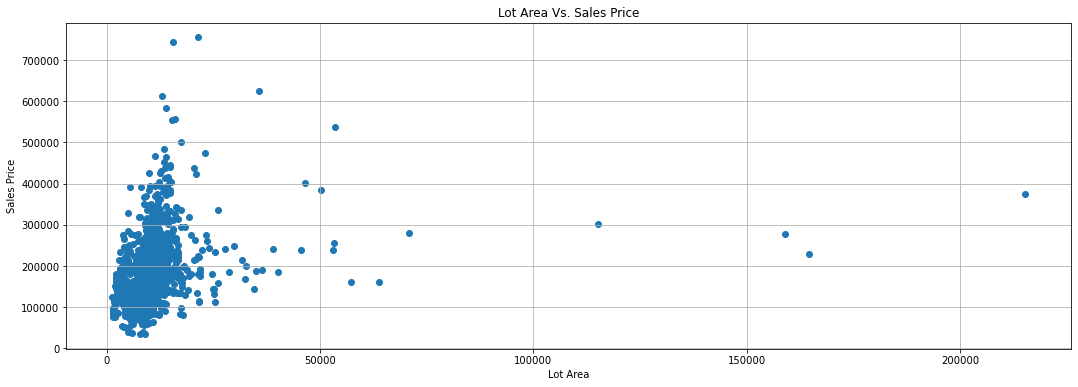

In [8]:
# How significant is the LotArea? Plot it against the Sales Price.
## LotArea (independent variable) in the x axis and Sales Price (dependent variable) in the y axis.

plt.scatter(y=data['SalePrice'], x=data['LotArea'])
plt.ylabel("Sales Price")
plt.xlabel('Lot Area')
plt.title("Lot Area Vs. Sales Price")

We can tackle this problem by looking at one of the fundamental techniques of Machine Learning - Linear Regression.

#### If you want to be pendatic, here's a thorough explanation of the algorithm...

When implementing linear regression of some dependent variable `𝑦` on the set of independent variables `𝐱 = (𝑥₁, …, 𝑥ᵣ)`, where `𝑟` is the number of predictors, you assume a linear relationship between `𝑦` and `x`: `𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀`. This equation is the regression equation. `𝛽₀, 𝛽₁, …, 𝛽ᵣ` are the regression coefficients, and `𝜀` is the random error.

In our case, `y` is the sale price and `𝑥₁` is the lot area.

Linear regression calculates the **estimators** of the regression coefficients or simply the **predicted weights**, denoted with `𝛽₀, 𝛽₁, …, 𝛽ᵣ`. They define the **estimated regression function** `𝑓(𝐱) = = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀`. This function should capture the dependencies between the inputs and output sufficiently well.

The estimated or predicted response, `𝑓(𝐱ᵢ)`, for each observation `𝑖 = 1, …, 𝑛`, should be as close as possible to the corresponding actual response `𝑦ᵢ`. The differences `𝑦ᵢ - 𝑓(𝐱ᵢ)` for all observations `𝑖 = 1, …, 𝑛`, are called the **residuals**. 

Regression is about determining the best predicted weights, that is **the weights corresponding to the smallest residuals**.

To get the best weights, you usually **minimize the sum of squared residuals (SSR)** for all observations 𝑖 = 1, …, 𝑛: 

$$SSR = Σᵢ(𝑦ᵢ - 𝑓(𝐱ᵢ))² $$

This approach is called the method of ordinary least squares.

### How can we measure performance?
The coefficient of determination, denoted as 𝑅², tells you **which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model**. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

If the total sum of squares is (proportional to the variance of the data):

$$SS_{tot} = Σᵢ(𝑦ᵢ - \overline{y})² $$

Then,

$$R^2 = 1 - \frac{SSR}{SS_{tot}}$$

The value 𝑅² = 1 corresponds to SSR = 0, that is to the perfect fit since the values of predicted and actual responses fit completely to each other.

For more information, refer to the [wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination).

### Simple Linear Regression - One Variable, x = Lot Area.

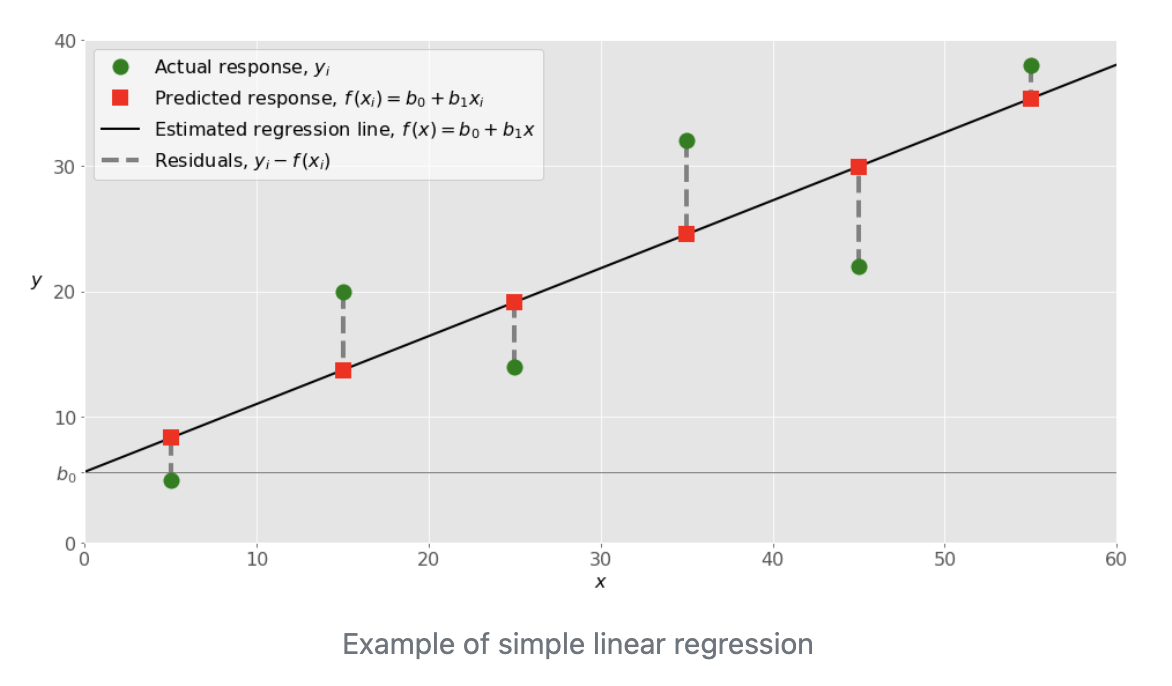

In [9]:
from IPython.display import Image
Image("images/simple_linear_reg.png")

#### Your goal above is to calculate the values of the predicted weights such that SSR is minimized, and R^2 is maximized.

In the equation above, 

$$b_0 = intercept$$
$$b_1 = slope$$

When you implement linear regression, you are actually trying to minimize these distances and make the red squares as close to the predefined green circles as possible.

In [55]:
# Back to the exercise:

import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

# You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. 
print('These are our features: \n', x)
print("This is what we are trying to predict: ", y)

These are our features: 
 [[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
This is what we are trying to predict:  [ 5 20 14 32 22 38]


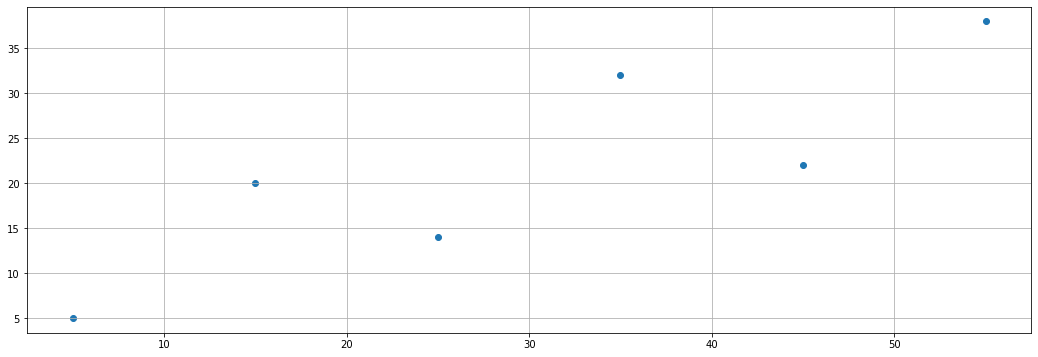

In [15]:
# Visualize your points on a graph.
plt.scatter(x, y);

In [16]:
# Initialize a Linear Regression model

model = LinearRegression()

* **`fit_intercept`** is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).
* **`normalize`** is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
* **`copy_X`** is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
* **`n_jobs`** is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

In [20]:
# Fit the model using your features to your targets

model.fit(x, y)

LinearRegression()

In [26]:
## Print the r^2, the intercept, and the slope of the regression.
print(model.score(x, y))
print(model.intercept_)
print(model.coef_) #coef_ = slope

0.715875613747954
5.633333333333329
[0.54]


In [27]:
# See what the predictions would be like for x.
model.predict(x), y

(array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
        35.33333333]),
 array([ 5, 20, 14, 32, 22, 38]))

In [74]:
# Reconstruct the regression line using the model's intercept and slope as a function.
# Use the function to predict y and compare with the model's predictions.

def compute_regression(x, model):
    # y = slope*x + Intercept
    prediction = model.coef_[0]*x+model.intercept_
    return prediction

compute_regression(5, model)

158846.65175663514

In [32]:
# Now, let's plot the regression line! This one's difficult so I'll help you out.

lowest_pred = model.predict((min(x)-5).reshape(-1, 1))
highest_pred = model.predict((max(x)+5).reshape(-1, 1))
regression_line = pd.Series(data=[lowest_pred[0], highest_pred[0]], 
                            index=[min(x)[0]-5, max(x)[0]+5])

In [33]:
# Now, plot x, y, and the regression line. Color the regression line black and make it dashed.

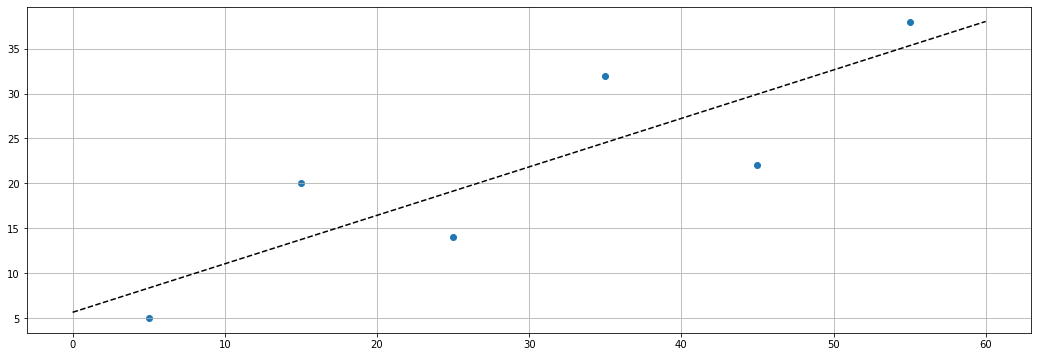

In [35]:
# Fit 10 random numbers on the line and plot them alongside the regression line from before.
plt.plot(regression_line, color='black', linestyle='--');
plt.scatter(x, y);
# Note all predictions are on the line. Why is that?

### Back to our problem:

In [66]:
# Restart the model and fit the LotArea to predict the SalePrice
# Come up with the regression predictions.

model = LinearRegression()

In [76]:
model.fit(X=data['LotArea'].values.reshape(-1,1), y=data['SalePrice'])
predictions = model.predict(data['LotArea'].values.reshape(-1, 1))

In [77]:
# Print the intercept, slope, and r^2s.
print("Intercept: ", int(model.intercept_))
print("Slope: ", round(model.coef_[0], 4))
print("R^2", round(model.score(data['LotArea'].values.reshape(-1, 1), data['SalePrice'].values), 4))

Intercept:  158836
Slope:  2.1
R^2 0.0696


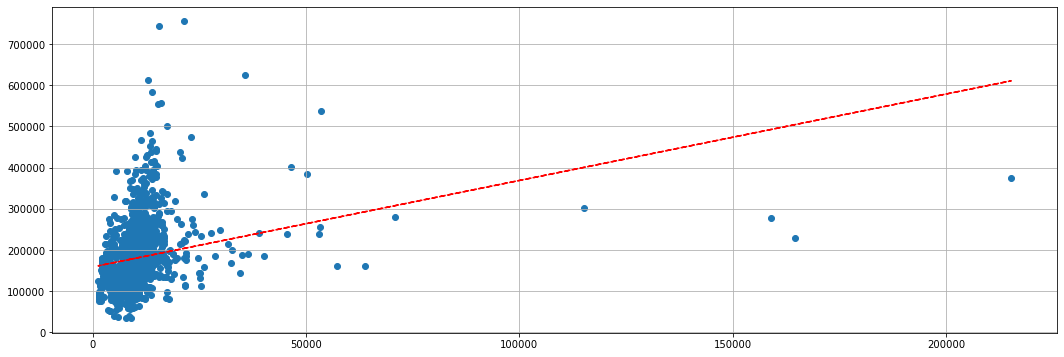

In [84]:
# Plot the regression line against the LotArea vs. SalePrice graph.
plt.scatter(data['LotArea'], data['SalePrice']);
plt.plot(data['LotArea'].values, predictions, color='red', linestyle='--')

Note any outliers? What if we make the line curvy instead of linear?

## Polynomial Regression with SKLearn

In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [86]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

For the polynomial feature, we add a column of data as $x^2$. That simple.

In [87]:
transformer = PolynomialFeatures(degree=2, include_bias=True)
transformer.fit(x)
x_ = transformer.transform(x)
x_ # Note the intercept on the left hand side of the equation!

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [88]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

Text(0.5, 1.0, 'Transformed Feature')

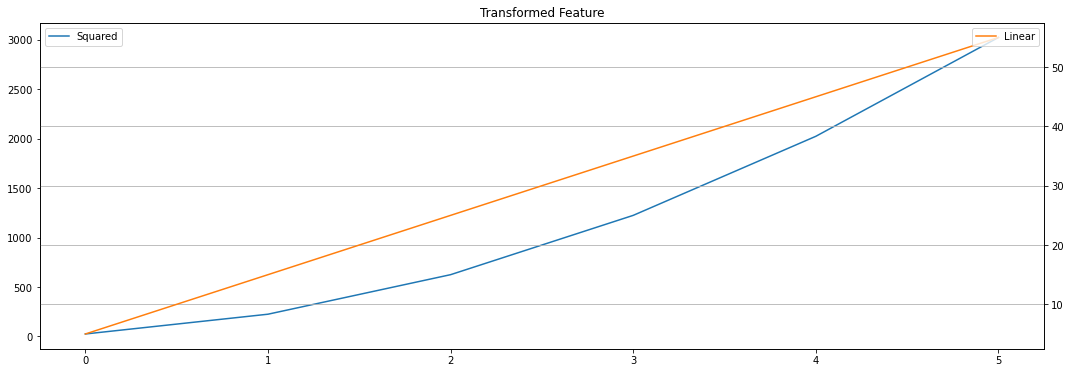

In [89]:
plt.plot(list(zip(*x_))[1], label='Squared')
plt.legend();
pd.Series(list(zip(*x_))[0]).plot(secondary_y=True, label='Linear')
plt.legend(loc=1);
plt.title("Transformed Feature")

In [90]:
model = LinearRegression(fit_intercept=True).fit(x_, y)

In [91]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


#### Back to our problem...

In [100]:
# Transform the dataset by the LotArea input in ascending order.
data.sort_values(by=['LotArea'], inplace=True)

In [104]:
# Transform the input to be polynomial.
transformer = PolynomialFeatures(degree=2, include_bias=True)
x_ = transformer.fit_transform(data['LotArea'].values.reshape(-1, 1), data['SalePrice'].values)
x_ # Note the intercept on the left hand side of the equation!

array([[1.00000000e+00, 1.30000000e+03, 1.69000000e+06],
       [1.00000000e+00, 1.47700000e+03, 2.18152900e+06],
       [1.00000000e+00, 1.49100000e+03, 2.22308100e+06],
       ...,
       [1.00000000e+00, 1.59000000e+05, 2.52810000e+10],
       [1.00000000e+00, 1.64660000e+05, 2.71129156e+10],
       [1.00000000e+00, 2.15245000e+05, 4.63304100e+10]])

In [105]:
# Fit a linear regression model to your polynomial data to predict the price of the houses.
model = LinearRegression(fit_intercept=True).fit(x_, data['SalePrice'].values)

In [106]:
# Print the r^2, intercept, and coefficients.
r_sq = model.score(x_, data['SalePrice'].values)
print('coefficient of determination: ', r_sq)
print('intercept: ', model.intercept_)
print('coefficient: ', model.coef_)

coefficient of determination:  0.13610758142019375
intercept:  123300.85821924446
coefficient:  [ 0.00000000e+00  6.02902692e+00 -2.75307957e-05]


In [113]:
# Visualize what the predictions look like against the ground truth value.

plt.plot(model.predict(x_), data['SalePrice'].values);
plt.plot(data['LotArea'].values, predictions, color='red', linestyle='--')

ValueError: shapes (8,3) and (1460,3) not aligned: 3 (dim 1) != 1460 (dim 0)

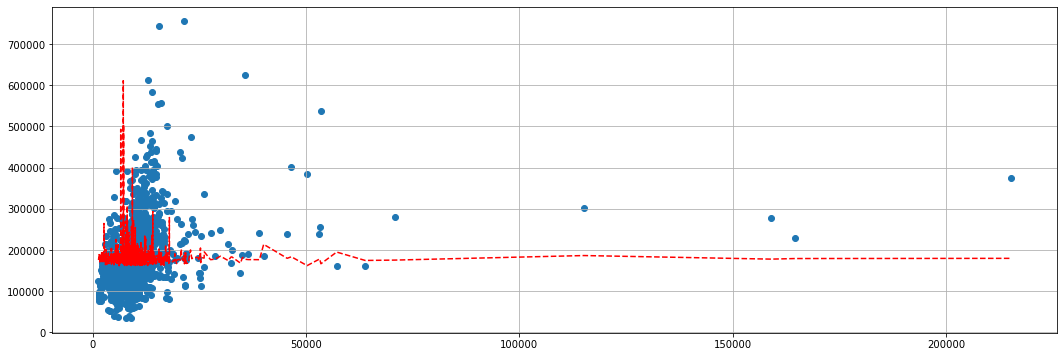

In [115]:
plt.scatter(data['LotArea'], data['SalePrice']);
plt.plot(data['LotArea'].values, predictions, color='red', linestyle='--')

So, can we just push the degree of our polynomial to 10 and continue getting better and better R^2's? In theory, yes. However, you will encounter an issue called **overfitting**.

Overfitting happens when a model learns both dependencies among data and random fluctuations. In other words, _a model learns the existing data too well_. 
Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data.

Underfitting occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

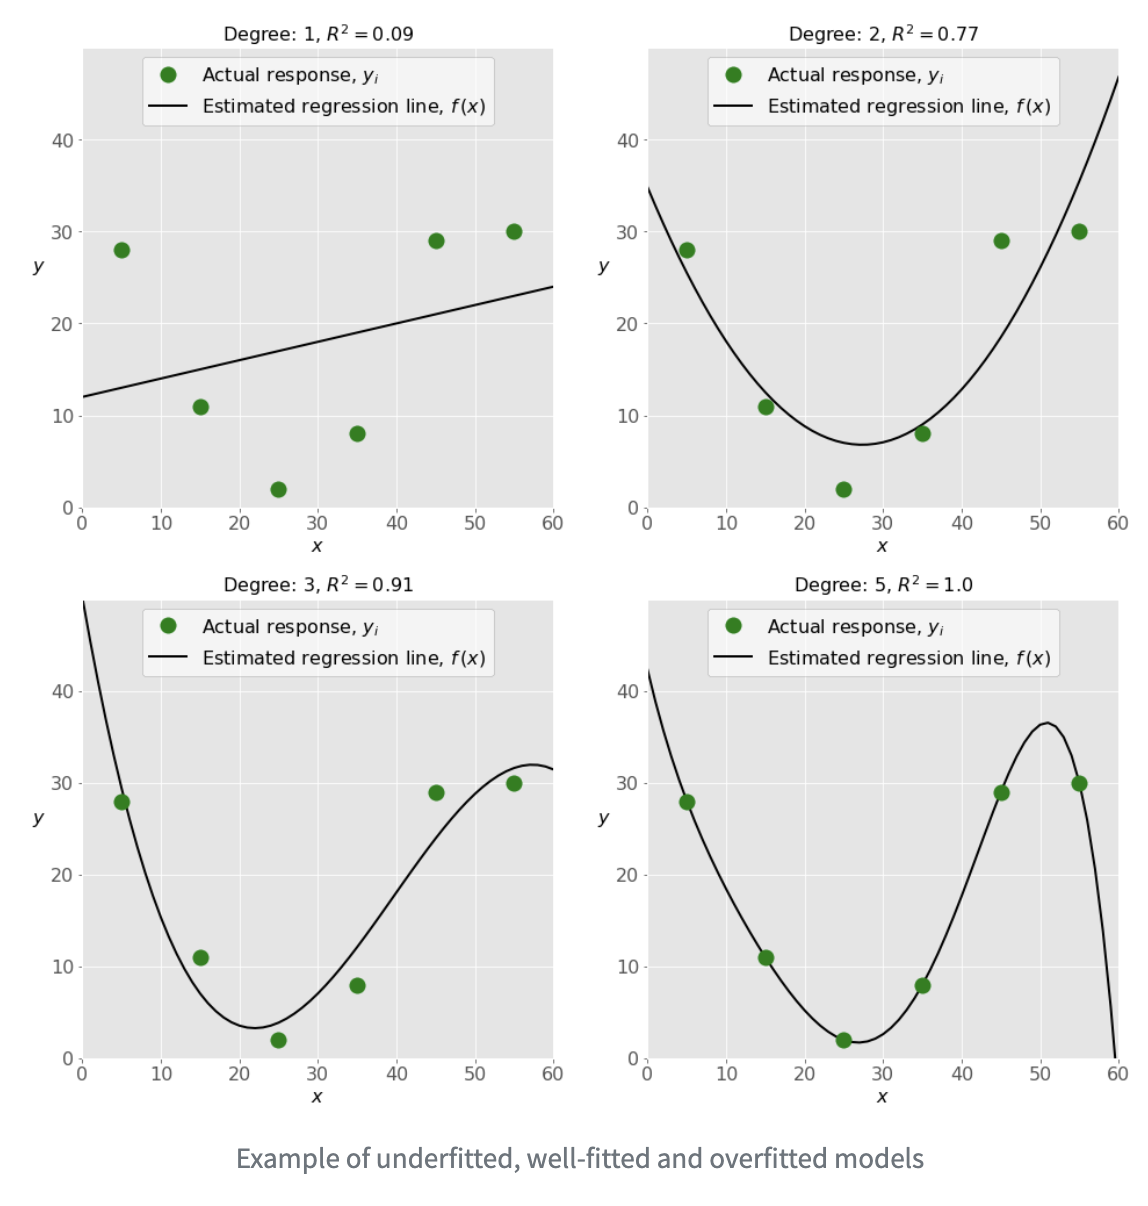

In [32]:
Image("images/overfitting.png")

On the bottom right plot, you can see the perfect fit: six points and the polynomial line of the degree 5 (or higher) yield `𝑅² = 1`. Each actual response equals its corresponding prediction.

In some situations, this might be exactly what you’re looking for. In many cases, however, this is an overfitted model. It is likely to have poor behavior with unseen data, especially with the inputs larger than 50.

## Using a different package - statsmodels.api

In [109]:
!pip install statsmodels

In [110]:
import numpy as np
import statsmodels.api as sm
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
x, y

(array([[ 1.,  0.,  1.],
        [ 1.,  5.,  1.],
        [ 1., 15.,  2.],
        [ 1., 25.,  5.],
        [ 1., 35., 11.],
        [ 1., 45., 15.],
        [ 1., 55., 34.],
        [ 1., 60., 35.]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [111]:
## Why would you use statsmodels? Summary!
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 08 Mar 2021   Prob (F-statistic):            0.00713
Time:                        21:08:12   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

/Users/homingchan/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Logistic Regression
Logistic Regression is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a **logit function**. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

Please read the description here: https://realpython.com/logistic-regression-python/

In [112]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Use logistic regression as in the link above to predict what zone a house is in depending on any of the other features.

# Resources

1. [Linear Regression in Python](https://realpython.com/linear-regression-in-python/)
2. [ML Algorithms](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)